## Introduction

- This notebook demonstrates how to use mljar auto ml to create a model that predicts which passengers survived the Titanic shipwreck.
- The data is available on [kaggle](https://www.kaggle.com/c/titanic).
![](https://storage.googleapis.com/kaggle-media/welcome/screen1.png)

## Import Required Packages

In [2]:
import pandas as pd
from supervised.automl import AutoML
from sklearn.metrics import accuracy_score


## Getting basic idea

In [3]:
df_train = pd.read_csv("./tests/data/Titanic/train.csv")
df_test = pd.read_csv("./tests/data/Titanic/test_with_Survived.csv")

In [4]:
print(f"The train data set contains {df_train.shape[0]} rows and {df_train.shape[1]} cols")
print(f"The test data set contains {df_test.shape[0]} rows and {df_test.shape[1]} cols")

The train data set contains 891 rows and 12 cols
The test data set contains 418 rows and 12 cols


In [27]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## AutoML 
- The `total_time_limit` is the time limit for training a single model, in seconds.


In [5]:
X_train,y_train = df_train.drop(['Survived'],axis=1),df_train['Survived']
X_test,y_test = df_test.drop(['Survived'],axis=1),df_test['Survived']


In [7]:
a = AutoML(total_time_limit=10)
a.fit(X_train,y_train)

AutoML directory: AutoML_2
The task is binary_classification with evaluation metric logloss
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline logloss 0.666775 trained in 0.21 seconds


Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


2_DecisionTree logloss 0.648504 trained in 58.35 seconds
Skip default_algorithms because of the time limit.
* Step ensemble will try to check up to 1 model
Ensemble logloss 0.518593 trained in 0.18 seconds
AutoML fit time: 64.94 seconds


AutoML(total_time_limit=10)

- It performs automatic EDA, the results are in Markdown report.
- the AutoML results in Markdown report.


## Extended EDA
To do extended bivariate data analysis of the data, mljar has `extended_eda` method.
This will do the bivariate analysis of features in the dataframe against the passed target feature.

Considering 7 the most frequent values
Considering 7 the most frequent values


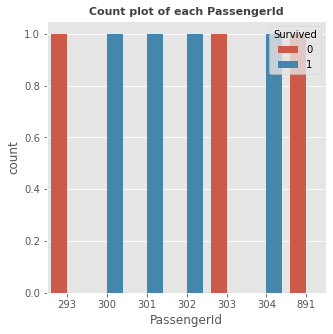

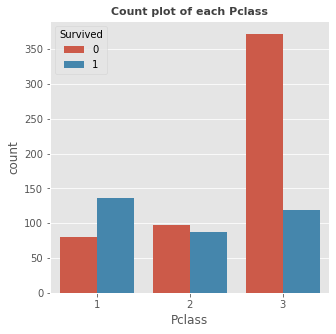

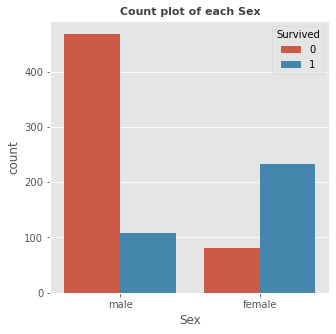

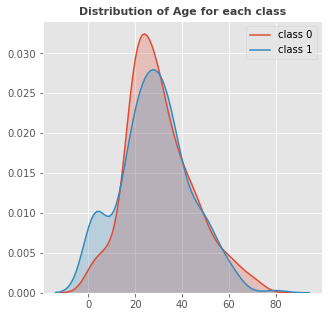

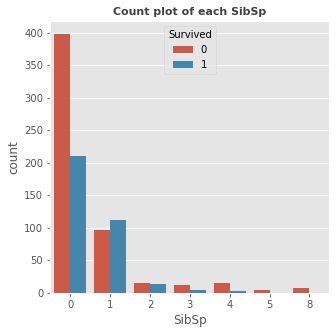

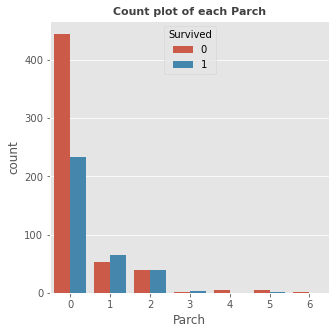

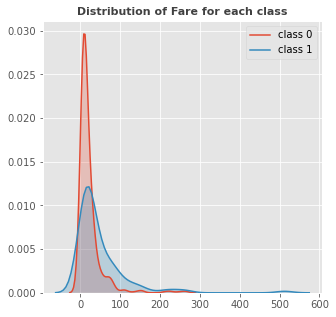

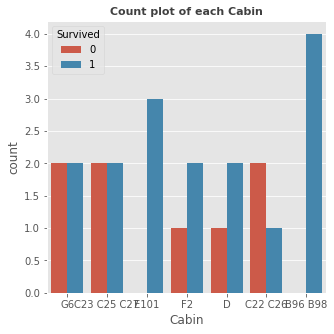

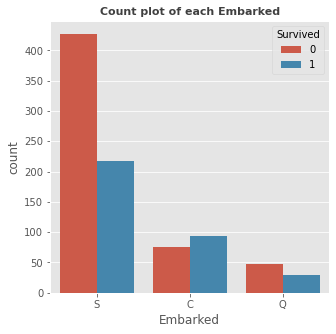

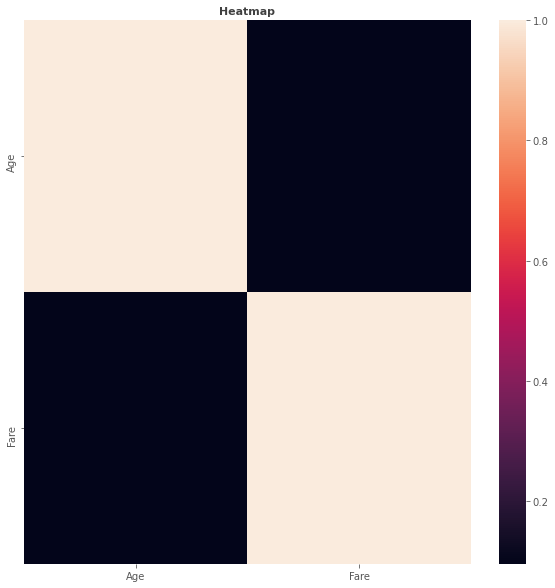

In [8]:
from supervised.preprocessing.eda import EDA

EDA.extensive_eda(X_train,y_train,save_path="/home/shahul/mljar-supervised/AutoML_1/")

## Make prediction on test 

In [9]:
predictions = a.predict(X_test)
predictions.shape

(418,)

## Evaluation 

In [10]:
print(f"Model scores {accuracy_score(y_test,predictions):.3f} on kaggle test dataset")

Model scores 0.758 on kaggle test dataset
